In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')


#load the dataset
dd=pd.read_excel('telcom_data.xlsx')
dd

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [3]:
dd.shape

(150001, 55)

In [4]:
dd.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
def preprocessing(dd):
    categorical_cols = []
    continious_cols = []
    for col in dd.columns:
        if dd[col].dtypes == "object":
            categorical_cols.append(col)
            dd[col].fillna(dd[col].mode()[0], inplace = True)
            
        else:
            dd[col].fillna(dd[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, dd
categorical_cols,continious_cols, dd_preprocessed = preprocessing(dd)

## Task 4. 1 - Write a Python program to assign:
#### a. Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point &         the    less engaged cluster (use the first clustering for this) (Euclidean Distance)

#### b. Experience score for each user. Consider the experience score as the Euclidean distance between the user data point &             the worst experience cluster. 

In [8]:
dd['Total_Traffic'] = dd['Total UL (Bytes)']+dd['Total DL (Bytes)']

##### Engagement Metrics

In [10]:
engagement_metrics = dd.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'Total_Traffic': 'sum'})
engagement_metrics.columns = ['Sessions Frequency', 'Session Duration', 'Session Total Traffic']

In [11]:
scaler = MinMaxScaler()
normalized_engagement_metrics = scaler.fit_transform(engagement_metrics)

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_engagement_metrics)
engagement_metrics['Cluster'] = kmeans.labels_

In [13]:
## Getting TCP Retransmission

dd['TCP Retransmission'] = dd['TCP DL Retrans. Vol (Bytes)'] + dd['TCP UL Retrans. Vol (Bytes)']
tcp_retransmission = dd.groupby('MSISDN/Number')['TCP Retransmission'].mean()
tcp_retransmission

MSISDN/Number
3.360100e+10    2.156957e+07
3.360100e+10    2.156957e+07
3.360100e+10    2.156957e+07
3.360101e+10    7.607247e+05
3.360101e+10    1.547020e+07
                    ...     
3.379000e+10    2.156957e+07
4.188282e+10    1.698397e+07
3.197021e+12    2.156957e+07
3.370000e+14    2.156957e+07
8.823971e+14    2.156957e+07
Name: TCP Retransmission, Length: 106857, dtype: float64

In [15]:
dd['RTT'] = (dd['Avg RTT DL (ms)'] + dd['Avg RTT UL (ms)']) 
rtt = dd.groupby('MSISDN/Number')['RTT'].mean()

handset_type = dd.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode())

dd['Throughput'] = dd['Avg Bearer TP DL (kbps)']+dd['Avg Bearer TP UL (kbps)']
throughput = dd.groupby('MSISDN/Number')['Throughput'].mean()

experience_metrics = pd.concat([tcp_retransmission, rtt, throughput], axis=1)
experience_metrics.columns = ['TCP Retransmission', 'RTT', 'Throughput']

In [16]:
rtt

MSISDN/Number
3.360100e+10     46.000000
3.360100e+10     31.000000
3.360100e+10    127.458589
3.360101e+10     84.000000
3.360101e+10     59.500000
                   ...    
3.379000e+10     40.000000
4.188282e+10    309.123982
3.197021e+12    127.458589
3.370000e+14    127.458589
8.823971e+14    127.458589
Name: RTT, Length: 106857, dtype: float64

experience_metrics

In [17]:
## Process the df for K-Means

def preprocessing(dd):
    categorical_cols = []
    continious_cols = []
    for col in dd.columns:
        if dd[col].dtypes == "object":
            categorical_cols.append(col)
            dd[col].fillna(dd[col].mode()[0], inplace = True)
            
        else:
            dd[col].fillna(dd[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, dd

categorical_cols,continious_cols, dd_preprocessed = preprocessing(dd)

In [18]:
scaler = MinMaxScaler()
normalized_experience_metrics = scaler.fit_transform(experience_metrics)

In [27]:
less_engaged_cluster_center = kmeans.cluster_centers_[np.argmin(kmeans.cluster_centers_[:, 0])]
engagement_score = cdist(normalized_engagement_metrics, [less_engaged_cluster_center], metric='euclidean').flatten()

# Assign an experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.
worst_experience_cluster_center = kmeans.cluster_centers_[np.argmax(kmeans.cluster_centers_[:, 0])]
experience_score = cdist(normalized_experience_metrics, [worst_experience_cluster_center], metric='euclidean').flatten()

In [28]:
less_engaged_cluster_center

array([0.00023432, 0.00149618, 0.00109864])

In [29]:
engagement_score

array([0.00054459, 0.00127342, 0.00035669, ..., 0.0105275 , 0.00190819,
       0.01043743])

In [30]:
worst_experience_cluster_center


array([1., 1., 1.])

In [31]:
experience_score

array([1.72873134, 1.72877398, 1.72820276, ..., 1.72839836, 1.72833316,
       1.72839632])

In [32]:
engagement_metrics['engagement_score'] = engagement_score
engagement_metrics['experience_score'] = experience_score

In [26]:
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score
MSISDN/Number,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,0,0.000545,1.728731
3.360100e+10,1,1.812300e+05,1.568596e+08,0,0.001273,1.728774
3.360100e+10,1,1.349690e+05,5.959665e+08,0,0.000357,1.728203
3.360101e+10,1,4.987800e+04,4.223207e+08,0,0.001006,1.730944
3.360101e+10,2,3.710400e+04,1.457411e+09,0,0.002041,1.673741
...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,0,0.000493,1.728686
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.730418,1.694066
3.197021e+12,1,8.773850e+05,2.321240e+08,2,0.010527,1.728398


####  Task 4.2   Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10         satisfied customer 

In [33]:
engagement_metrics['satisfaction_score'] = (engagement_metrics['engagement_score'] + engagement_metrics['experience_score'])/2

In [34]:
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,0,0.000545,1.728731,0.864638
3.360100e+10,1,1.812300e+05,1.568596e+08,0,0.001273,1.728774,0.865024
3.360100e+10,1,1.349690e+05,5.959665e+08,0,0.000357,1.728203,0.864280
3.360101e+10,1,4.987800e+04,4.223207e+08,0,0.001006,1.730944,0.865975
3.360101e+10,2,3.710400e+04,1.457411e+09,0,0.002041,1.673741,0.837891
...,...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,0,0.000493,1.728686,0.864589
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.730418,1.694066,1.712242
3.197021e+12,1,8.773850e+05,2.321240e+08,2,0.010527,1.728398,0.869463


In [35]:
## Top 10 satisfied Customers

engagement_metrics['satisfaction_score'].nlargest(10)

MSISDN/Number
4.188282e+10    1.712242
3.362578e+10    0.980069
3.362632e+10    0.918827
3.376054e+10    0.916021
3.361489e+10    0.909239
3.366469e+10    0.907083
3.366746e+10    0.902633
3.366716e+10    0.900240
3.365922e+10    0.897018
3.366412e+10    0.896044
Name: satisfaction_score, dtype: float64

In [36]:
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,0,0.000545,1.728731,0.864638
3.360100e+10,1,1.812300e+05,1.568596e+08,0,0.001273,1.728774,0.865024
3.360100e+10,1,1.349690e+05,5.959665e+08,0,0.000357,1.728203,0.864280
3.360101e+10,1,4.987800e+04,4.223207e+08,0,0.001006,1.730944,0.865975
3.360101e+10,2,3.710400e+04,1.457411e+09,0,0.002041,1.673741,0.837891
...,...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,0,0.000493,1.728686,0.864589
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.730418,1.694066,1.712242
3.197021e+12,1,8.773850e+05,2.321240e+08,2,0.010527,1.728398,0.869463


##### Task 4.3  Build a regression model of your choice to predict the satisfaction score of a customer. 

In [38]:
## Regression Model  --> Linear Regression Model

# Define X and y
X,y =  engagement_metrics.drop(["satisfaction_score"], axis =1 ), engagement_metrics["satisfaction_score"]

In [39]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85485, 6), (21372, 6), (85485,), (21372,))

In [41]:
# Modelling
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Starting training
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([0.84231211, 0.86426806, 0.86581284, ..., 0.84456249, 0.81992278,
       0.85950322])

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test, y_pred)

1.0

In [46]:
y_pred_train = model.predict(X_train)

In [47]:
y_pred_train

array([0.85885913, 0.86460716, 0.86501799, ..., 0.86462393, 0.86496836,
       0.85517391])

In [48]:
r2_score(y_train, y_pred_train)

1.0

In [50]:
import matplotlib.pyplot as plt
index = []
for i in range(len(X_test)):
    index.append(i)

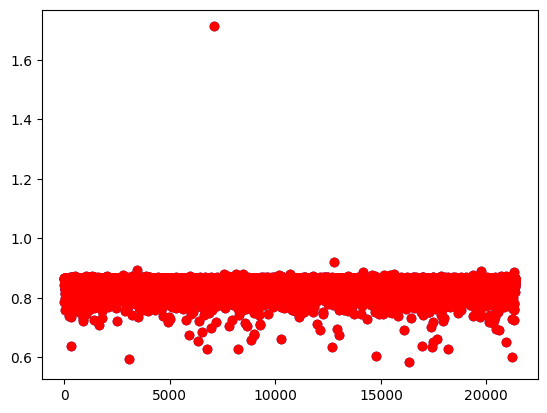

In [51]:
plt.scatter( index,y_test, color =  "darkblue")
plt.scatter( index,y_pred, color =  "red")

##### Task 4.4   Run a k-means (k=2) on the engagement & the experience score. 

In [52]:
cluster_data = engagement_metrics.iloc[:,4:6]
cluster_data

,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,0.000545,1.728731
3.360100e+10,0.001273,1.728774
3.360100e+10,0.000357,1.728203
3.360101e+10,0.001006,1.730944
3.360101e+10,0.002041,1.673741
...,...,...
3.379000e+10,0.000493,1.728686
4.188282e+10,1.730418,1.694066
3.197021e+12,0.010527,1.728398


In [53]:
km = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
label = km.fit_predict(cluster_data)
centroids = km.cluster_centers_
print(f'# Centroids of the clustering:\n{centroids}')
print(f'# The number of iterations required to converge: {km.inertia_}')
print(f'# The number of iterations required to converge: {km.n_iter_}')

# Centroids of the clustering:
[[1.52231011e-03 1.72065234e+00]
 [1.67825725e-03 1.62474481e+00]]
# The number of iterations required to converge: 68.7448999731862
# The number of iterations required to converge: 8


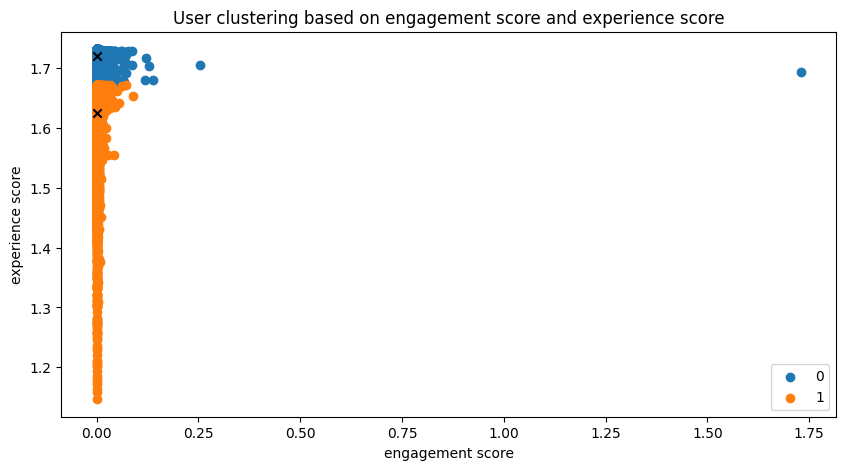

In [54]:
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10,5))
plt.title(f'User clustering based on engagement score and experience score')
for i in u_labels:
    plt.scatter(cluster_data[label == i].iloc[:,0] , cluster_data[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1], marker='x', color = 'black')
plt.xlabel("engagement score")
plt.ylabel("experience score")
plt.legend()
plt.savefig('kmeans.png')
plt.show()


In [55]:
##### Task 4.5  Aggregate the average satisfaction & experience score per cluster. 

In [56]:
Aggregate_data = engagement_metrics.copy(deep=True)
Aggregate_data['cluster'] = label
Aggregate_data

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score,satisfaction_score,cluster
MSISDN/Number,,,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,0,0.000545,1.728731,0.864638,0
3.360100e+10,1,1.812300e+05,1.568596e+08,0,0.001273,1.728774,0.865024,0
3.360100e+10,1,1.349690e+05,5.959665e+08,0,0.000357,1.728203,0.864280,0
3.360101e+10,1,4.987800e+04,4.223207e+08,0,0.001006,1.730944,0.865975,0
3.360101e+10,2,3.710400e+04,1.457411e+09,0,0.002041,1.673741,0.837891,0
...,...,...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,0,0.000493,1.728686,0.864589,0
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.730418,1.694066,1.712242,0
3.197021e+12,1,8.773850e+05,2.321240e+08,2,0.010527,1.728398,0.869463,0


In [57]:
Aggregate_columns = {'engagement_score':'mean','experience_score':'mean','satisfaction_score':'mean'}
#Group and Aggregate
Aggregate_data =Aggregate_data.groupby('cluster').agg(Aggregate_columns)

In [58]:
Aggregate_data

,engagement_score,experience_score,satisfaction_score
cluster,,,
0,0.001523,1.720626,0.861075
1,0.001676,1.624623,0.813149


##### Task 4.6  Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table. 

In [61]:
Final_Table = engagement_metrics.copy(deep=True)
Final_Table.reset_index(inplace=True)
Final_Table = Final_Table.rename(columns={'MSISDN/Number': 'user_id'})

Final_Table

In [62]:
Final_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106857 entries, 0 to 106856
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                106857 non-null  float64
 1   Sessions Frequency     106857 non-null  int64  
 2   Session Duration       106857 non-null  float64
 3   Session Total Traffic  106857 non-null  float64
 4   Cluster                106857 non-null  int32  
 5   engagement_score       106857 non-null  float64
 6   experience_score       106857 non-null  float64
 7   satisfaction_score     106857 non-null  float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 6.1 MB


In [63]:
Final_Table.columns

Index(['user_id', 'Sessions Frequency', 'Session Duration',
       'Session Total Traffic', 'Cluster', 'engagement_score',
       'experience_score', 'satisfaction_score'],
      dtype='object')

In [64]:
Final_table = Final_Table.drop(['Sessions Frequency','Session Duration','Session Total Traffic','Cluster' ],axis=1)

In [65]:
Final_table

,user_id,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,0.000545,1.728731,0.864638
1,3.360100e+10,0.001273,1.728774,0.865024
2,3.360100e+10,0.000357,1.728203,0.864280
3,3.360101e+10,0.001006,1.730944,0.865975
4,3.360101e+10,0.002041,1.673741,0.837891
...,...,...,...,...
106852,3.379000e+10,0.000493,1.728686,0.864589
106853,4.188282e+10,1.730418,1.694066,1.712242
106854,3.197021e+12,0.010527,1.728398,0.869463
106855,3.370000e+14,0.001908,1.728333,0.865121
